In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lxml import etree
from bs4 import BeautifulSoup
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Primeiro treinamento
# termos = ["Igualdade Racial","Igualdade","Racismo","Discriminação Racial","Ação Afirmativa","Desigualdade Racial","Equidade Racial","Inclusão Racial","Diversidade Racial","Políticas de Igualdade Racial","Justiça Racial","Reparação Racial","Assédio Racial","Preconceito Racial","Educação Antirracista","Cotas Raciais","Promoção da Igualdade Racial","Combate ao Racismo","Conscientização Racial","Equidade de Oportunidades","Diversidade étnica","Inclusão Social","Direitos Humanos","Tolerância Racial","Respeito à Diversidade","Equilíbrio Racial","Harmonia Racial","Eliminação do Racismo","Dignidade Racial","Participação Racial","Representatividade Racial","Empoderamento Racial","Cidadania Racial","Igualdade de Gênero e Racial","Políticas Públicas Antirracismo","Hate Crimes","Lei Contra a Discriminação Racial","Monitoramento Racial","Estatísticas Raciais","Liberdade Racial","Identidade Racial","Orgulho Racial","Autoafirmação Racial","Integração Racial","Respeito à Cultura Racial","Equidade no Mercado de Trabalho","Combate ao Racismo Estrutural","Educação para a Igualdade Racial","Promoção da História e Cultura Racial","Solidariedade Racial","Justiça Reparadora","Equidade Racial","Empoderamento da Comunidade Negra","Reconhecimento Racial","Cidadania Plena","Acesso à Saúde Racial","Educação Racialmente Sensível","Integração étnica","Desigualdade Econômica Racial","Transparência Racial","Justiça Restaurativa","Revisão da História Racial","Inclusão Racial em Mídia","Tolerância Zero para o Racismo","Equilíbrio de Poder Racial","Garantia de Direitos Raciais","Leis Antidiscriminação","Diversidade em Instituições","Revisão de Esteriótipos Raciais","Acesso à Moradia Racial","Acesso à Justiça Racial","Mapeamento Racial","Linguagem Inclusiva Racial","Participação Comunitária Racial","Fortalecimento de Organizações Raciais","Acessibilidade Racial","Práticas Empresariais Inclusivas","Educação Racial nas Escolas","Promoção de Lideranças Raciais","Policiamento não Discriminatório","Reconhecimento de Patrimônio Cultural Racial","Desenvolvimento Econômico Racial","Campanhas Contra o Racismo","Equidade no Sistema de Justiça","Conscientização sobre Racismo Sistêmico","Diversidade no Setor Público","Garantia de Cidadania Racial","Estratégias de Combate ao Racismo","Promoção de Estudos Raciais","Monitoramento de Práticas Raciais","Inclusão de Povos Indígenas","Garantia de Direitos de Populações Raciais","Equidade na Saúde Mental Racial","Respeito à Religião Racial","Acessibilidade a Recursos Raciais","Apoio à Juventude Racial","Inclusão Racial nas Políticas Culturais","Reconhecimento de Terras Indígenas","Línguas e Culturas Raciais","Estratégias de Comunicação Racial"]

#adição das palavras da reunião 10/11/2023
termos = ["Igualdade racial","Igualdade étnico racial","Equidade","Equidade racial","Negros","Pretos","Pardos","Ação afirmativa","Reserva de vagas","Cotas","Quilombolas","Ciganos","Quilombola","cigano","Comunidades tradicionais","Quilombos","Povos de terreiro","Comunidade de matriz africana","Discriminação religiosa","Intolerância religiosa","Racismo religioso","Racismo ambiental","Racismo algorítmico","Genocídio","Genocídio antinegro","Injúria Racial","Crimes raciais","Antirracista","Letramento racial","Educação antirracista","Heteroidentificação","Autoclassificação","Autodeclaração","Cultura afro","Cultura africana","Matriz africana","Afro","Cultura Afro-brasileira","Afroturismo","Afroempreendedorismo","Afrofuturismo","Ancestralidade","Diáspora","Axé","Raça","Racial","Representatividade étnico-racial","Combate ao racismo","Enfrentamento ao racismo","População negra","Povo negro","Mulher negra","Mulheres negras","Encarceramento","Encarceramento em massa","Chacinas","Orgulho negro","Reparação histórica","Jovem negro","Jovens negros","Saúde da população negra","Saúde da mulher negra","Letalidade policial","Igualdade Racial","Igualdade","Racismo","Discriminação Racial","Ação Afirmativa","Desigualdade Racial","Equidade Racial","Inclusão Racial","Diversidade Racial","Políticas de Igualdade Racial","Justiça Racial","Reparação Racial","Assédio Racial","Preconceito Racial","Educação Antirracista","Cotas Raciais","Promoção da Igualdade Racial","Combate ao Racismo","Conscientização Racial","Equidade de Oportunidades","Diversidade étnica","Inclusão Social","Direitos Humanos","Tolerância Racial","Respeito à Diversidade","Equilíbrio Racial","Harmonia Racial","Eliminação do Racismo","Dignidade Racial","Participação Racial","Representatividade Racial","Empoderamento Racial","Cidadania Racial","Igualdade de Gênero e Racial","Políticas Públicas Antirracismo","Hate Crimes","Lei Contra a Discriminação Racial","Monitoramento Racial","Estatísticas Raciais","Liberdade Racial","Identidade Racial","Orgulho Racial","Autoafirmação Racial","Integração Racial","Respeito à Cultura Racial","Equidade no Mercado de Trabalho","Combate ao Racismo Estrutural","Educação para a Igualdade Racial","Promoção da História e Cultura Racial","Solidariedade Racial","Justiça Reparadora","Equidade Racial","Empoderamento da Comunidade Negra","Reconhecimento Racial","Cidadania Plena","Acesso à Saúde Racial","Educação Racialmente Sensível","Integração étnica","Desigualdade Econômica Racial","Transparência Racial","Justiça Restaurativa","Revisão da História Racial","Inclusão Racial em Mídia","Tolerância Zero para o Racismo","Equilíbrio de Poder Racial","Garantia de Direitos Raciais","Leis Antidiscriminação","Diversidade em Instituições","Revisão de Esteriótipos Raciais","Acesso à Moradia Racial","Acesso à Justiça Racial","Mapeamento Racial","Linguagem Inclusiva Racial","Participação Comunitária Racial","Fortalecimento de Organizações Raciais","Acessibilidade Racial","Práticas Empresariais Inclusivas","Educação Racial nas Escolas","Promoção de Lideranças Raciais","Policiamento não Discriminatório","Reconhecimento de Patrimônio Cultural Racial","Desenvolvimento Econômico Racial","Campanhas Contra o Racismo","Equidade no Sistema de Justiça","Conscientização sobre Racismo Sistêmico","Diversidade no Setor Público","Garantia de Cidadania Racial","Estratégias de Combate ao Racismo","Promoção de Estudos Raciais","Monitoramento de Práticas Raciais","Inclusão de Povos Indígenas","Garantia de Direitos de Populações Raciais","Equidade na Saúde Mental Racial","Respeito à Religião Racial","Acessibilidade a Recursos Raciais","Apoio à Juventude Racial","Inclusão Racial nas Políticas Culturais","Reconhecimento de Terras Indígenas","Línguas e Culturas Raciais","Estratégias de Comunicação Racial"]

In [54]:
pasta = 'treinamento/positivo'
arquivos = os.listdir(pasta)
train = []
rotulos = []
# Itera pelos arquivos e lê o conteúdo de cada um
for arquivo in arquivos:
    linha = []
    # Verifica se é um arquivo e se é um arquivo txt
    if os.path.isfile(os.path.join(pasta, arquivo)) :
        if (os.path.join(pasta, arquivo)[-3:] == "txt"):
            with open(os.path.join(pasta, arquivo), 'r',encoding='utf-8') as f:
                conteudo = f.read()
        elif(os.path.join(pasta, arquivo)[-3:] == "xml"):
            tree = etree.parse(os.path.join(pasta, arquivo))
            root = tree.getroot()
            conteudo = BeautifulSoup(root.xpath('//xml//body//Texto')[0].text, "html.parser").get_text()
        for termo in termos:
            if termo.lower() in conteudo.lower():
                linha.append(1)
            else:
                linha.append(0)
        linha.append(1)
    train.append(linha)

In [55]:
pasta = 'treinamento/negativo'
arquivos = os.listdir(pasta)
arquivosLidos=0
# Itera pelos arquivos e lê o conteúdo de cada um
for arquivo in arquivos:
    linha = []
    # Verifica se é um arquivo e se é um arquivo txt
    if os.path.isfile(os.path.join(pasta, arquivo)):
        if (os.path.join(pasta, arquivo)[-3:] == "txt"):
            with open(os.path.join(pasta, arquivo), 'r',encoding='utf-8') as f:
                conteudo = f.read()
                for termo in termos:
                    if termo.lower() in conteudo.lower():
                        linha.append(1)
                    else:
                        linha.append(0)
        elif(os.path.join(pasta, arquivo)[-3:] == "xml"):
            tree = etree.parse(os.path.join(pasta, arquivo))
            root = tree.getroot()
            conteudo = BeautifulSoup(root.xpath('//xml//body//Texto')[0].text, "html.parser").get_text()
            for termo in termos:
                if termo.lower() in conteudo.lower():
                    linha.append(1)
                else:
                    linha.append(0)
        linha.append(0)
    train.append(linha)

In [8]:
def prepararTexto(texto):
    texto = texto.lower()
    texto = re.sub("-"," ",)
    return texto

def avaliar(linha):
    linha = np.array(linha)
    predicao = model.predict(linha.reshape(1, -1))
    if predicao[0] == 1:
        return True
    else:
        return False

In [57]:
# dados de treinamento
data = pd.DataFrame(train)

# preparação dos dados de treinamento
parametros = data.iloc[:, :-1]  # Todas as colunas, exceto a última
target = data.iloc[:, -1]   # A última coluna

# Inicialize o modelo de regressão logística
model = LogisticRegression()

# Treine o modelo nos dados de treinamento
model.fit(parametros, target)

# Faça previsões nos dados de teste
# y_pred = model.predict(X_test)

LogisticRegression()

In [8]:
pasta = 'DOU/'
pastas = os.listdir(pasta)
verd = []
falso = []
for pasta in pastas:
    pasta = "DOU/"+pasta
    arquivos = os.listdir(pasta)
    for arquivo in arquivos:
        # Verifica se é um arquivo e se é um arquivo txt
        linha=[]
        if os.path.isfile(os.path.join(pasta, arquivo)):
            if (os.path.join(pasta, arquivo)[-3:] == "xml"):
                tree = etree.parse(os.path.join(pasta, arquivo))
                root = tree.getroot()
                conteudo = BeautifulSoup(root.xpath('//xml//body//Texto')[0].text, "html.parser").get_text()
                for termo in termos:
                    if termo.lower() in conteudo.lower():
                        linha.append(1)
                    else:
                        linha.append(0)
                if(avaliar(linha)):
                    verd.append(pasta+"/"+arquivo) 
                else:
                    falso.append(arquivo)

Saida da classificação para excel

In [88]:
def ler_arquivos_com_prefixo(pasta, prefixo):
    arquivos = os.listdir(pasta)
    arquivos_com_prefixo = []
    for arquivo in arquivos:
        basename = os.path.basename(arquivo)
        if basename.startswith(prefixo):
            with open(os.path.join(pasta, arquivo), "r",encoding='utf-8') as f:
                arquivos_com_prefixo.append(pasta+"/"+arquivo)
    return arquivos_com_prefixo
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l
def extrair_numero_apos_hifen(arquivo):
    partes = arquivo.split('-')
    if len(partes) > 1:
        numero = partes[-1].split('.')[0]
        return int(numero)
    return 0

In [93]:
#pegar o texto de todos os arquivos de uma mesma publicação
arquivosPegos = []
for arquivo in verd:
    if "-" in arquivo:#se o nome do arquivo tiver "-"  é pq ele foi dividido pelo DOU
        arquivosConcatenar = ler_arquivos_com_prefixo(arquivo[:8],arquivo[9:].split("-")[0])
        arquivosPegos.append(arquivosConcatenar)
    else:
        arquivosPegos.append([arquivo])
arquivosPegos = remove_repetidos(arquivosPegos)
lista_ordenada = []
for arquivo in arquivosPegos:
    lista_ordenada.append(sorted(arquivo, key=extrair_numero_apos_hifen))

In [106]:
linha = []
for listaArquivo in lista_ordenada:
    tree = etree.parse((listaArquivo[0]))
    root = tree.getroot()
#     conteudo = BeautifulSoup(root.xpath('//xml//body//Texto')[0].text, "html.parser").get_text()
    artType = root.xpath('//xml//article')[0].get("artType")
    pdfPage = root.xpath('//xml//article')[0].get("pdfPage")
    pubDate = root.xpath('//xml//article')[0].get("pubDate")
    artCategory = root.xpath('//xml//article')[0].get("artCategory")
    try:
        ementa = BeautifulSoup(root.xpath('//xml//body//Ementa')[0].text, "html.parser").get_text()
    except:
        ementa = " "
    try:
        ident = BeautifulSoup(root.xpath('//xml//body//Identifica')[0].text, "html.parser").get_text()
    except:
        ident = " "
    linha.append([pubDate,pdfPage,artType,ementa,ident,artCategory])

C:\Users\krist\AppData\Local\Temp\ipykernel_12412\1992845704.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  ementa = BeautifulSoup(root.xpath('//xml//body//Ementa')[0].text, "html.parser").get_text()
C:\Users\krist\AppData\Local\Temp\ipykernel_12412\1992845704.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  ident = BeautifulSoup(root.xpath('//xml//body//Identifica')[0].text, "html.parser").get_text()


In [107]:
df = pd.DataFrame(linha)

In [105]:
df.to_excel("saida.xlsx")

Correlação de Pearson

In [58]:
termos.append("Target")
data.rename(columns=dict(zip(data.columns, termos)), inplace=True)
correlation_matrix = data.corr()

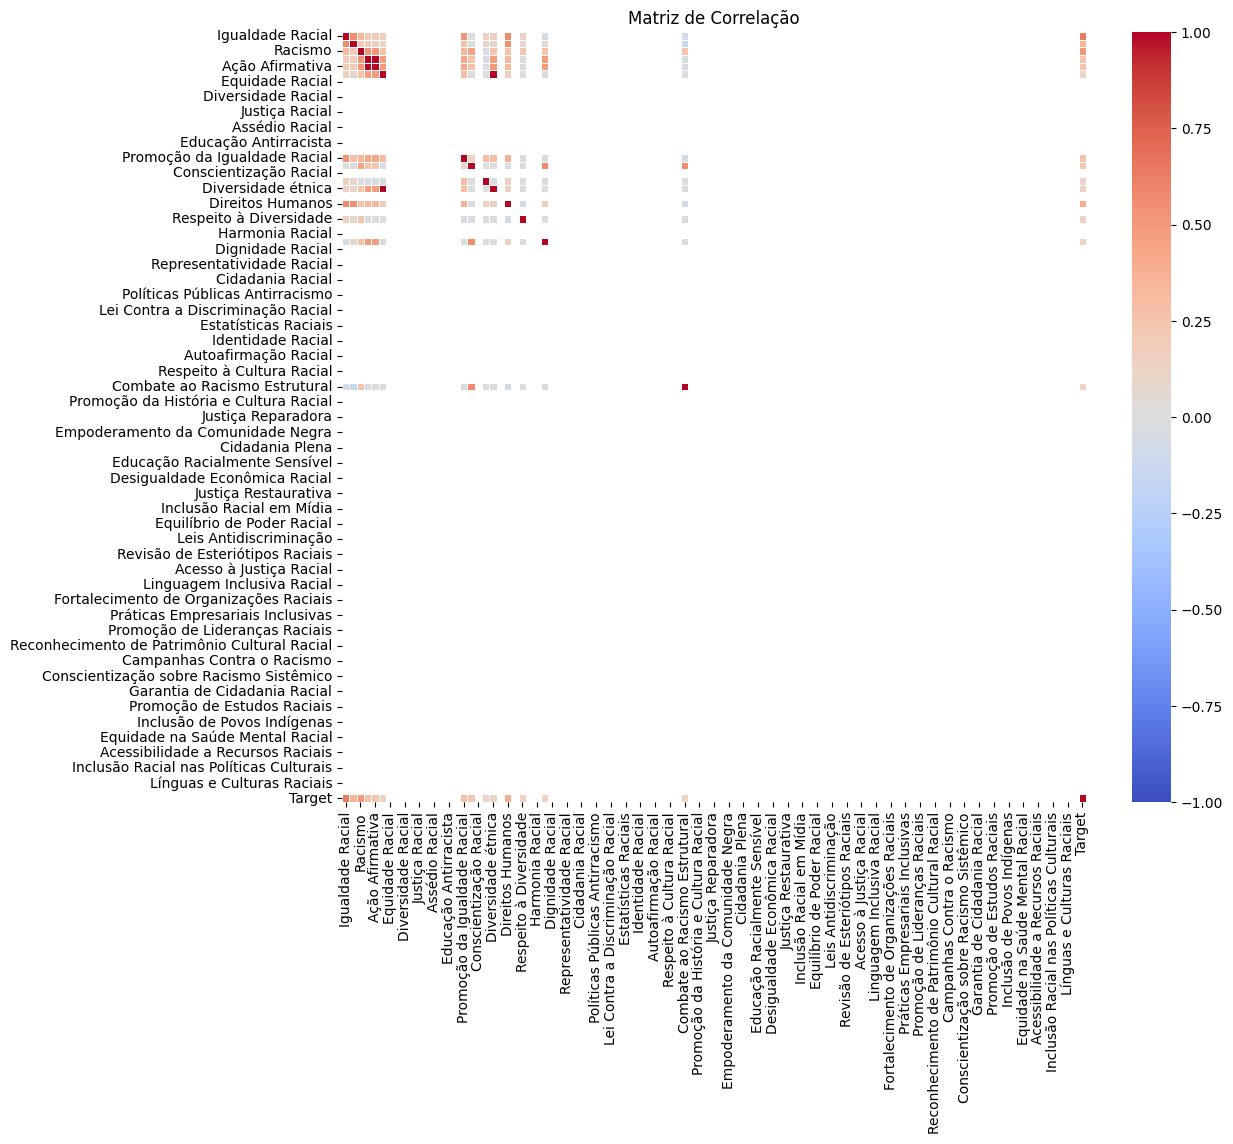

In [59]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1,linecolor='white')
plt.title("Matriz de Correlação")
plt.show()

In [65]:
correlation_matrix.to_excel("correlation_matrix.xlsx")

In [99]:
# Carregue seus dados de um arquivo CSV (ou outra fonte)
data = pd.DataFrame(train)

# Divida os dados em recursos (X) e alvo (y)
X = data.iloc[:, :-1]  # Todas as colunas, exceto a última
y = data.iloc[:, -1]   # A última coluna

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Inicialize o modelo de regressão logística
model = LogisticRegression()

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

In [100]:
# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')

Acurácia: 0.9167


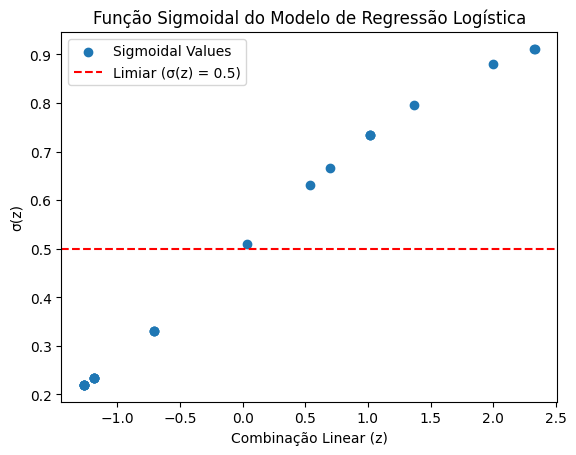

In [102]:
# Calcular a combinação linear z para o conjunto de teste
z_values = np.dot(X_test, model.coef_.T) + model.intercept_

# Aplicar a função sigmoidal
sigmoid_values = 1 / (1 + np.exp(-z_values))

# Visualizar a função sigmoidal
plt.scatter(z_values, sigmoid_values, label='Sigmoidal Values')
plt.axhline(0.5, color='red', linestyle='--', label='Limiar (σ(z) = 0.5)')

# Adicionar uma linha conectando os valores da função sigmoidal
# plt.plot(z_values, sigmoid_values, color='blue', linestyle='-', linewidth=1, label='Linha Sigmoidal')

plt.title('Função Sigmoidal do Modelo de Regressão Logística')
plt.xlabel('Combinação Linear (z)')
plt.ylabel('σ(z)')
plt.legend()
plt.show()